# Spring 2022 Simulations

This notebook walks through the code for simulating different scenarios for the Spring 2022 semester.

There are two main scenarios for the spring 2022 semester: virtual instruction and in-person instruction.

We currently use a single-group simulation to model the virtual instruction scenario, and a multi-group simulation to model the in-person instruction scenario.

The two groups we consider are high-contact undergrads and low-contact undergrads.  The virtual instruction simulations only include the high-contact undergrads, with the assumption that low-contact undergrads would not return to campus for this period.

## Virtual Instruction Scenario: Single-group Simulation

The code for running stochastic compartmental simulations is located in `src/simulations_v2/`.  We'll add this folder to the python path and import from the following files:
* `stochastic_simulation.py` has the base code for the single-group simulation
* `load_params.py` has code for loading sim config files

In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('.'))
sys.path.append(module_path + "/../../src/simulations_v2")

from stochastic_simulation import StochasticSimulation
from load_params import load_params

The file `high_contact_ugs.yaml` contains the simulation configuration for the high-contact undergrads we simulate in the virtual instruction scenario.  Let's print the contents of this file and then initialize a simulation with the parameters it specifies.

In [7]:
with open('high_contact_ugs.yaml', 'r') as f:
    print(f.read())
    
# load_params returns a tuple: 
#     the first element is the name of the scenario, 
#     the second element is a dictionary that can be used to initialize a StochasticSimulation object
scenario_name, params = load_params("./high_contact_ugs.yaml")  

virtual_sim = StochasticSimulation(params)

_scenario_name: High Contact Undergrads

# ignore symptomatic and self-reporting dynamics
asymptomatic_daily_self_report_p: 0
asymptomatic_pct_mult: 1
symptomatic_daily_self_report_p: 0

# reducing contact trace effectiveness to 0
perform_contact_tracing: false
cases_isolated_per_contact: 0  # MAP estimate from Spring 2021 data is 1.215
cases_quarantined_per_contact: 0
contact_trace_testing_frac: 1
contact_tracing_delay: 1

# average length of time in isolation is 10 days based on my current
# understanding of the protocol
daily_leave_QI_p: 0.1
daily_leave_QS_p: 0.1


# previous calibration was 1.42e-05.  Multiply by 5 for omicron
daily_outside_infection_p: 7.1e-05

# transmission rate parameters are below:
# spring 2021 calibrated values were 7.36
# multiplying by 1.4477 = MAP estimate for contact multiplier
expected_contacts_per_day: 10.66


# fall 2021 calibrated value was  0.13125. 
# adjusting by factor of 1.366 = 5 (omicron multiplier) 
#                           *0.2732 (MAP es

### Running a Simulation

The `StochasticSimulation#run_new_trajectory(T)` function runs a new simulation replication with time horizon `T`.  Let's run a simulation and inspect the output.

In [8]:
trajectory_df = virtual_sim.run_new_trajectory(3 * 7)
trajectory_df

,S,QS,QI,R,E_0,E_1,E_2,E_3,E_4,E_5,...,SyID_severe_17,SyID_severe_18,SyID_severe_19,cumulative_mild,cumulative_severe,cumulative_outside_infections,severity_0,severity_1,severity_2,severity_3
0,6234,0,0,1463,0,0,0,0,0,0,...,0,1,2,1465,15,0,1465,14.6311,0.270237,0.0987007
1,6034,0,21,1467,51,53,34,22,8,2,...,2,2,1,1499,43,0,1499,41.9424,0.77468,0.282942
2,5817,0,34,1471,116,84,60,33,12,1,...,3,1,0,1534,87,1,1534,84.8602,1.56738,0.572464
3,5578,0,65,1477,151,119,81,36,7,5,...,3,1,1,1583,156,1,1583,152.163,2.81047,1.02649
4,5269,0,103,1489,201,157,102,33,16,1,...,1,2,1,1647,221,2,1647,215.564,3.98149,1.45419
5,4891,0,146,1511,267,204,94,45,13,2,...,2,4,1,1711,298,2,1711,290.67,5.36871,1.96085
6,4395,0,198,1533,345,230,137,44,22,9,...,4,2,2,1794,387,2,1794,377.481,6.97212,2.54648
7,3856,0,251,1561,369,299,126,65,30,7,...,4,5,0,1897,505,2,1897,492.579,9.09799,3.32292
8,3249,0,328,1605,439,302,184,79,32,10,...,7,2,1,2024,647,2,2024,631.086,11.6562,4.25729
9,2576,0,449,1655,508,356,178,97,34,10,...,10,5,4,2207,844,2,2207,823.241,15.2053,5.55356


The `run_new_trajectory` function returns a dataframe where each row corresponds to the state of the simulation on that day, and each column corresponds to a state variable (or a simple function of the state variables).  

Important state variables are:
* `S`, which specifies the size of the free & susceptible population
* `QI`, the number of the infected individuals in isolation
* `QS`, the number of susceptible individuals in quarantine
* `R`, the number of recovered individuals

There are a number of state variables to track the status of free and infectious individuals, but one way to obtain the aggregate number of free and infectious individuals is the value $S-R-QI-QS$.

The columns `cumulative_mild` and `cumulative_severe` are additional columns to help track the cumulative number of infections that have been discovered on each day.

Let's plot the progression of cumulative infections under the trajectory we just sampled.

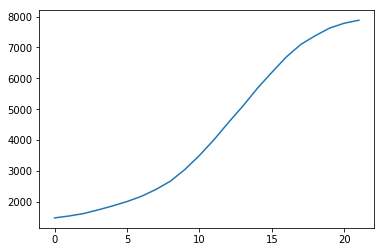

In [9]:
%matplotlib inline
trajectory_df[['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot()

### Omicron Multiplier Sensitivity Analysis

The params specified in `high_contact_ugs.yaml` are a single point-estimate of the parameters for the omicron variant.

Specifically, look at the `exposed_infection_p` parameter, which governs the probability a susceptible individual who is exposed to the virus becomes infected.  The comments here specify how this parameter is set. We are taking the previous parameter value, which was calibrated to Fall 2021 pre-omicron data, and multiplying by $0.27$ for the effect of vaccines, multiplying by $0.5$ for the effect of boosters, and multiplying by $5$ for the effect of Omicron.  


Let's run a sensitivity analysis where we see how final infection counts change if we use values other than $5$ for the Omicron multiplier.

In [10]:
import numpy as np

transmission_multipliers = np.linspace(1,5,9)

print("simulating transmission multipliers {}".format(transmission_multipliers))

nreps = 20
horizon = 7 * 3

result_dfs = {}

base_transmission = params['exposed_infection_p'] / 5


for mult in transmission_multipliers:
    params['exposed_infection_p'] = base_transmission * mult
    sim = StochasticSimulation(params)
    trajectory_dfs = []
    for _ in range(nreps):
        trajectory_dfs.append(sim.run_new_trajectory(horizon))
    result_dfs[mult] = trajectory_dfs
    print("finished simulating {}".format(mult))

simulating transmission multipliers [1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
finished simulating 1.0
finished simulating 1.5
finished simulating 2.0
finished simulating 2.5
finished simulating 3.0
finished simulating 3.5
finished simulating 4.0
finished simulating 4.5
finished simulating 5.0


Let's plot the average trajectory for each Omicron multiplier

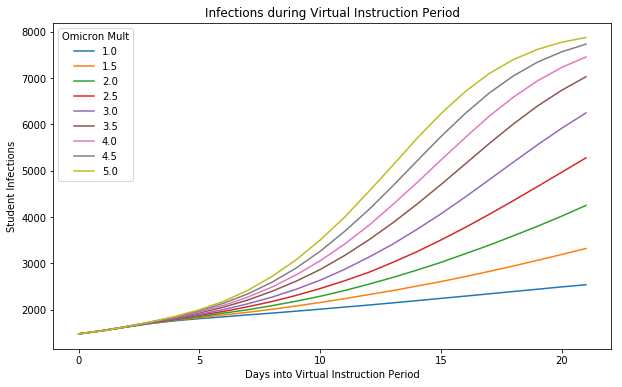

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# get the avg trajectory for each multiplier

average_trajectories = {}
for mult in result_dfs:
    cumulative_dfs = [df[['cumulative_mild', 'cumulative_severe']].sum(axis=1) for df in result_dfs[mult]]
    average_trajectories[mult] = np.mean(cumulative_dfs, axis=0)
    

plt.figure(figsize=(10,6))
for mult in average_trajectories:
    plt.plot(average_trajectories[mult], label=round(mult, 1))
    
plt.title('Infections during Virtual Instruction Period')
plt.xlabel('Days into Virtual Instruction Period')
plt.ylabel('Student Infections')
plt.legend(title='Omicron Mult')
plt.show()

Let's also plot how final infections vary with the transmission multiplier

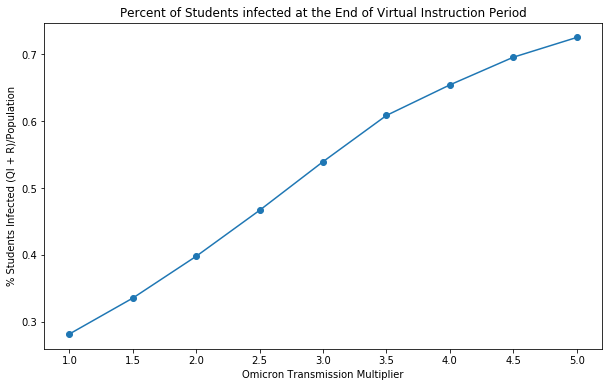

In [18]:

def get_QI_R(df):
    return df[['QI', 'R']].iloc[df.shape[0] - 1].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
QI_R_popsize = list()
for mult in transmission_multipliers:
    QI_R_pop = list()
    for sim_df in result_dfs[mult]:
        QI_R_pop.append(get_QI_R(sim_df))
    QI_R_popsize.append(np.mean(QI_R_pop) / params['population_size'])

plt.plot(np.array(transmission_multipliers), QI_R_popsize, marker='o')
    
plt.title('Percent of Students infected at the End of Virtual Instruction Period')
plt.xlabel('Omicron Transmission Multiplier')
plt.ylabel('% Students Infected (QI + R)/Population')
# plt.legend(title='Omicron Mult')
plt.show()

## In-Person Instruction Scenario: Multi-Group Simulation

Let's now switch attention to the in-person simulations, which use the multigroup simulation.  

The code for the multigroup simulation is located in `src/simulations_v2/multi_group_simulation.py`.  There are also additional functions in `src/simulations_v2/load_params.py` for loading multi group simulation config files.  

Let's import what we need:

In [19]:
from multi_group_simulation import MultiGroupSimulation
from load_params import load_multigroup_params

Our in-person scenario simulations use a multigroup simulation with two groups: the high-contact students that we simulated above, and the low-contact students who only return to campus when instruction is in-person.

There are two more parameter files to inspect: the file `low_contact_ugs.yaml` specifies the parameter configuration for the low-contact stuent group, and the file `in_person_multigroup.yaml` specifies the overall parameter configuration for the multigroup in-person simulation.

In [21]:
with open('low_contact_ugs.yaml', 'r') as f:
    print(f.read())
    

_inherit_config: high_contact_ug_virtual_config.yaml
_scenario_name: Low Contact Undergrads

population_size: 3949

daily_outside_infection_p: 1.7775e-05 #7.11e-06 (prev calibrated value) * 5 (omicron adjustment) * 0.5 (booster adjustment)

expected_contacts_per_day: 2.142 #1.48 (prev calibrated value) * 1.4477 (MAP estimate for contact multiplier)

initial_R_count: 366




The `load_params` function specifies this `_inherit_config` param, which lets you inherit all the parameters from some other config file, and change only those parameters you need to change.

In [22]:
with open('in_person_multigroup.yaml', 'r') as f:
    print(f.read())
    

# Every multi-group parameter config still needs a _scenario_name field
_scenario_name: "Multigroup Spring 2022"

# Every multi-group parameter config also needs a _num_groups field, specifying
# an integer number of groups
_num_groups: 2

# _group_configs is a list of single-group scenario configs
_group_configs:
    _group_0:
        _scenario_name: High Contact Undergrads
        _inherit_config: high_contact_ug_virtual_config.yaml
        expected_contacts_per_day: 7.36 # from ../vax_sims/vax_sims_LHS_samples.py#load_calibrated_params

    _group_1:
        _scenario_name: Low Contact Undergrads
        _inherit_config: low_contact_ugs.yaml
        expected_contacts_per_day: 1.48 # arbitrary within-group contacts/day

# _inter_group_expected_contacts is a list of lists, such that (group_x, group_y) value
# specifies poisson-parameter governing number of group_y interactions per day
# that a free individual from group_x encounters
# all missing values default to 0
_inter_group_expec

The multigroup config file lets you specify how many groups you use, the individual parameter files to use for each group, and an intergroup contact matrix.

## Running in-person simulations without high-contact herd immunity

In [26]:
group_params, group_names, interactions_mtx = load_multigroup_params("./in_person_multigroup.yaml")

pct_in_R = group_params[0]['initial_R_count'] / group_params[0]['population_size'] * 100
print("{:.1f}% are initially recovered for group {}".format(pct_in_R, group_names[0]))

multigroup_sim = MultiGroupSimulation(group_params, interactions_mtx)

sim_dfs = [[], []]
nreps = 20
horizon = 7 * 12

for _ in range(nreps):
    multigroup_sim.run_new_trajectory(horizon)
    for idx, sim in enumerate(multigroup_sim.sims):
        sim_dfs[idx].append(sim.sim_df)

18.2% are initially recovered for group High Contact Undergrads


Recovering the simulation dataframes from the multigroup sim is a little bit more work: the `MultiGroupSimulation` object maintains a list of single group sim objects, and after running a new multigroup trajectory we record the `sim_df` currently stored in each of these objects.

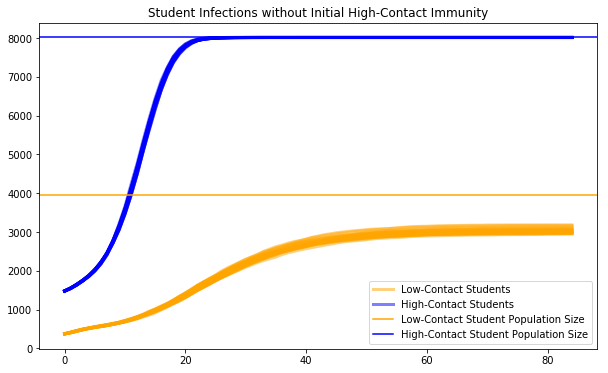

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

label="Low-Contact Students"
for idx in range(20):
    sim_dfs[1][idx][['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot(linewidth=3,alpha=0.5,
                                                                               color='orange', label=label)
    label=''

label="High-Contact Students"

for idx in range(20):
    sim_dfs[0][idx][['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot(linewidth=3,alpha=0.5,
                                                                               color='blue', label=label)
    label=''
    
    
plt.axhline(group_params[1]['population_size'], label="Low-Contact Student Population Size", color='orange')
plt.axhline(group_params[0]['population_size'], label="High-Contact Student Population Size", color='blue')

plt.title("Student Infections without Initial High-Contact Immunity")
plt.legend(loc='best')

## Running in-person simulations with high-contact herd immunity

Let's modify the high-contact group parameters so that they are all assumed to be recovered at teh start of in-person instruction (the most extreme version of herd immunity).

In [36]:
group_params[0]['initial_R_count'] = group_params[0]['population_size']
group_params[0]['initial_ID_prevalence'] = 0

multigroup_sim = MultiGroupSimulation(group_params, interactions_mtx)

sim_dfs = [[], []]
nreps = 20
horizon = 7 * 12

for _ in range(nreps):
    multigroup_sim.run_new_trajectory(horizon)
    for idx, sim in enumerate(multigroup_sim.sims):
        sim_dfs[idx].append(sim.sim_df)

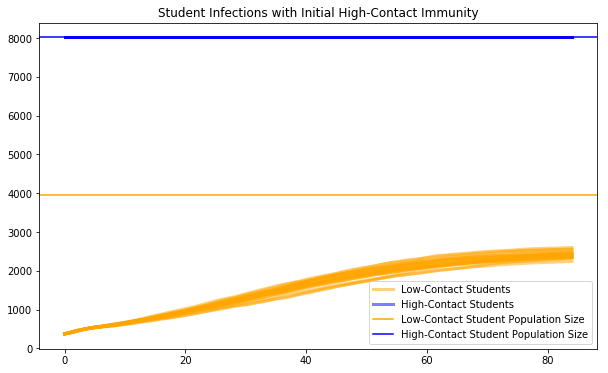

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,6))

label="Low-Contact Students"
for idx in range(20):
    sim_dfs[1][idx][['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot(linewidth=3,alpha=0.5,
                                                                               color='orange', label=label)
    label=''

label="High-Contact Students"

for idx in range(20):
    sim_dfs[0][idx][['cumulative_mild', 'cumulative_severe']].sum(axis=1).plot(linewidth=3,alpha=0.5,
                                                                               color='blue', label=label)
    label=''
    
    
plt.axhline(group_params[1]['population_size'], label="Low-Contact Student Population Size", color='orange')
plt.axhline(group_params[0]['population_size'], label="High-Contact Student Population Size", color='blue')

plt.title("Student Infections with Initial High-Contact Immunity")
plt.legend(loc='best')